In [ ]:
# 📊 Customer Sales Analysis
'''
Objective:
Analyze customer purchasing patterns, identify top customers, and create a comprehensive sales performance dashboard.

Tools: Python, Pandas, Matplotlib, Seaborn  
Deliverables: Aggregations, Joins, Pivot Tables, Visualizations, Business Insights
'''

'\n**Objective:**  \nAnalyze customer purchasing patterns, identify top customers, and create a comprehensive sales performance dashboard.\n\n**Tools:** Python, Pandas, Matplotlib, Seaborn  \n**Deliverables:** Aggregations, Joins, Pivot Tables, Visualizations, Business Insights\n'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create visualizations folder if not exists
os.makedirs("visualizations", exist_ok=True)

plt.style.use("default")

In [5]:
sales_df = pd.read_csv("C:\\Users\\Seher\\Desktop\\DA-TASK-5\\data\\sales_data.csv")
customer_df = pd.read_csv("C:\\Users\\Seher\\Desktop\\DA-TASK-5\\data\\customer_churn.csv")

print("Sales Data Shape:", sales_df.shape)
print("Customer Data Shape:", customer_df.shape)

sales_df.head(), customer_df.head()

Sales Data Shape: (100, 7)
Customer Data Shape: (500, 9)


(         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
 0  2024-01-01       Phone         7  37300     CUST001   East       261100
 1  2024-01-02  Headphones         4  15406     CUST002  North        61624
 2  2024-01-03       Phone         2  21746     CUST003   West        43492
 3  2024-01-04  Headphones         1  30895     CUST004   East        30895
 4  2024-01-05      Laptop         8  39835     CUST005  North       318680,
   CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
 0     C00001       6              64          1540        One year   
 1     C00002      21             113          1753  Month-to-month   
 2     C00003      27              31          1455        Two year   
 3     C00004      53              29          7150  Month-to-month   
 4     C00005      16             185          1023        One year   
 
       PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
 0       Credit Card               No              1 

In [6]:
sales_df.info()
customer_df.info()

sales_df.isnull().sum(), customer_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   P

(Date           0
 Product        0
 Quantity       0
 Price          0
 Customer_ID    0
 Region         0
 Total_Sales    0
 dtype: int64,
 CustomerID          0
 Tenure              0
 MonthlyCharges      0
 TotalCharges        0
 Contract            0
 PaymentMethod       0
 PaperlessBilling    0
 SeniorCitizen       0
 Churn               0
 dtype: int64)

In [9]:
# Convert Date column
sales_df["Date"] = pd.to_datetime(sales_df["Date"], errors="coerce")

# Ensure numeric types
sales_df["Quantity"] = pd.to_numeric(sales_df["Quantity"], errors="coerce")
sales_df["Price"] = pd.to_numeric(sales_df["Price"], errors="coerce")

# Recalculate Total_Sales (even if column exists, for correctness)
sales_df["Total_Sales"] = sales_df["Quantity"] * sales_df["Price"]

# Drop missing values
sales_df.dropna(inplace=True)
customer_df.dropna(inplace=True)

sales_df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [10]:
# Rename Customer_ID to match CustomerID for merge
sales_df = sales_df.rename(columns={"Customer_ID": "CustomerID"})

merged_df = pd.merge(sales_df, customer_df, on="CustomerID", how="left")

merged_df.head()

,Date,Product,Quantity,Price,CustomerID,Region,Total_Sales,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,2024-01-01,Phone,7,37300,CUST001,East,261100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-03,Phone,2,21746,CUST003,West,43492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Aggregation 1: Top Sales
top_customers = (
    merged_df.groupby("CustomerID")["Total_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers

CustomerID
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
CUST084    324144
CUST070    318762
CUST005    318680
CUST065    312564
CUST028    304465
Name: Total_Sales, dtype: int64

In [14]:
#Aggregation 2: Monthly Sales Trend 
merged_df["Month"] = merged_df["Date"].dt.to_period("M")

monthly_sales = merged_df.groupby("Month")["Total_Sales"].sum()
monthly_sales

Month
2024-01    4120524
2024-02    2656050
2024-03    4485006
2024-04    1103468
Freq: M, Name: Total_Sales, dtype: int64

In [15]:
#Aggregation 3: Sales by Region
region_sales = merged_df.groupby("Region")["Total_Sales"].sum()
region_sales

Region
East     2519639
North    3983635
South    3737852
West     2123922
Name: Total_Sales, dtype: int64

In [16]:
#Pivot Table
pivot_table = pd.pivot_table(
    merged_df,
    values="Total_Sales",
    index="Region",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)

pivot_table.head()

Product,Headphones,Laptop,Monitor,Phone,Tablet
Region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


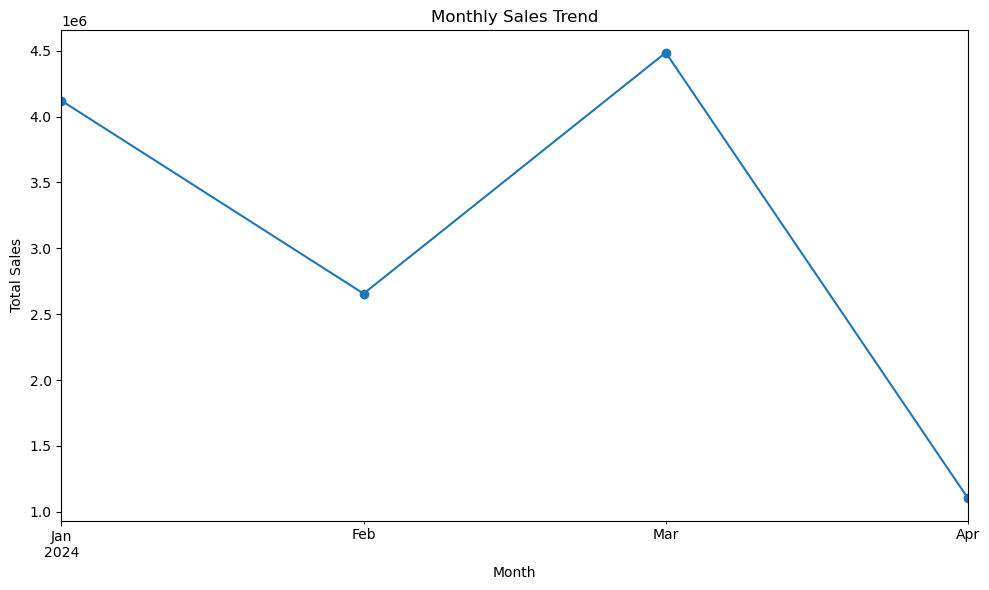

In [17]:
#Visualization 1: Monthly Revenue
plt.figure(figsize=(10,6))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("visualizations/revenue_by_month.png")
plt.show()

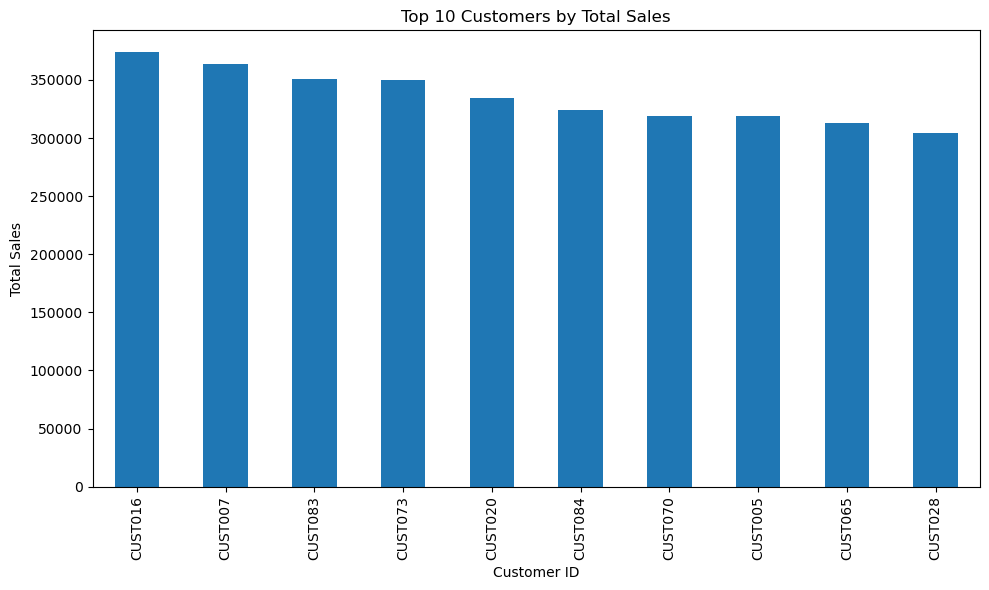

In [18]:
#Visualization 2: Top Customers
plt.figure(figsize=(10,6))
top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("visualizations/top_customers.png")
plt.show()

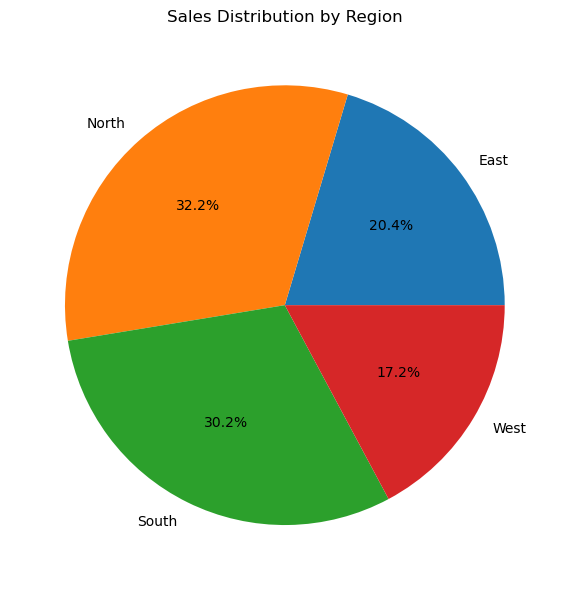

In [19]:
#Visualization 3: Sales by Region
plt.figure(figsize=(8,6))
region_sales.plot(kind="pie", autopct="%1.1f%%")
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.tight_layout()
plt.savefig("visualizations/sales_by_region.png")
plt.show()

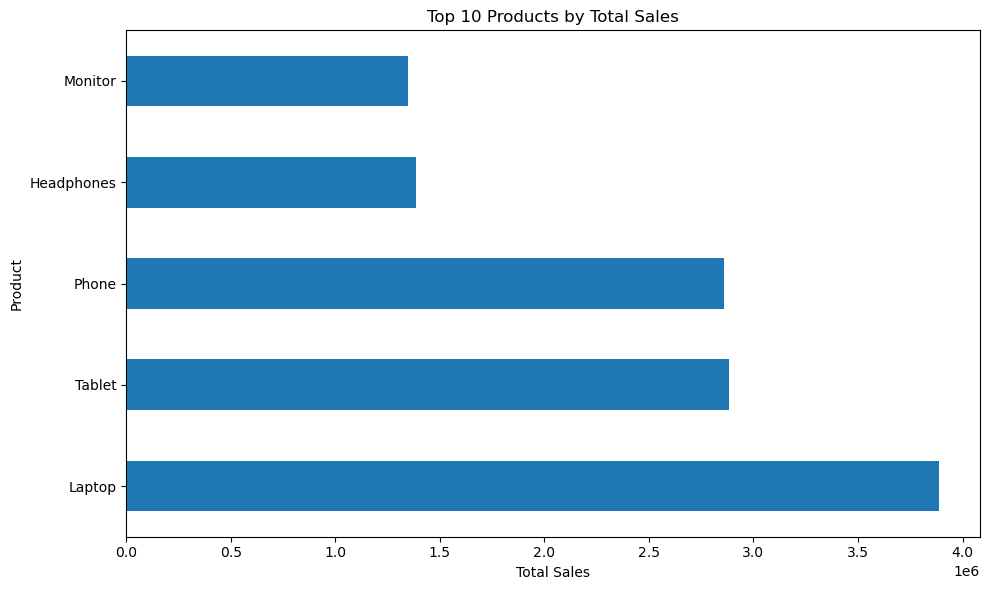

In [20]:
#Visualization 4: Product Trends
product_sales = (
    merged_df.groupby("Product")["Total_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
product_sales.plot(kind="barh")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.savefig("visualizations/product_trends.png")
plt.show()

In [21]:
#Key Metrics
total_revenue = merged_df["Total_Sales"].sum()
total_customers = merged_df["CustomerID"].nunique()
avg_order_value = merged_df.groupby("CustomerID")["Total_Sales"].sum().mean()

top_customer_id = top_customers.index[0]
top_customer_value = top_customers.iloc[0]

total_revenue, total_customers, avg_order_value, top_customer_id, top_customer_value

(12365048, 100, 123650.48, 'CUST016', 373932)

In [22]:
#Retention Analysis
retention_rate = 1 - merged_df["Churn"].mean()
retention_rate

nan